In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Mask mandate data

In [2]:
mask_county=pd.read_csv('Input data/mask-use-by-county.csv')

In [3]:
mask_county.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


### US state and territorial Public mask mandates data

In [4]:
US_mask_mandates=pd.read_csv('Input data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')

In [5]:
US_mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [6]:
US_mask_mandates.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation'],
      dtype='object')

In [7]:
len(US_mask_mandates)

1593869

In [8]:
US_mask_mandates.isnull().sum()

State_Tribe_Territory                 0
County_Name                           0
FIPS_State                            0
FIPS_County                           0
date                                  0
order_code                            0
Face_Masks_Required_in_Public    606314
Source_of_Action                 606314
URL                              651574
Citation                         616596
dtype: int64

### Reading and cleaning the John Hopkins data

### Assigned county to me - Hamilton (Ohio)

US data sources at the state (Admin1) or county/city (Admin2) level



In [9]:
county='hamilton'
state='ohio'



In [10]:
RAW_us_confirmed=pd.read_csv('Input data/RAW_us_confirmed_cases.csv')
RAW_us_confirmed.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18480,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65895,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6926,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7560,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17286,17320,17320,17320,17320,17320


### Select data for the allocated county

In [11]:
RAW_us_confirmed_county=RAW_us_confirmed[(RAW_us_confirmed['Admin2'].str.lower()==county) & (RAW_us_confirmed['Province_State'].str.lower()==state)]
RAW_us_confirmed_county.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
2154,Ohio,Hamilton,84039061,US,USA,840,39061.0,US,39.196736,-84.545029,...,222672,222672,222672,222672,222672,223461,223461,223461,223461,223461


In [12]:
US_mask_mandates_county=US_mask_mandates[US_mask_mandates['County_Name'].str.lower().str.contains(county)]
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
90972,FL,Hamilton County,12,47,4/10/2020,2,NaN,NaN,NaN,NaN
90973,FL,Hamilton County,12,47,4/11/2020,2,NaN,NaN,NaN,NaN
90974,FL,Hamilton County,12,47,4/12/2020,2,NaN,NaN,NaN,NaN
90975,FL,Hamilton County,12,47,4/13/2020,2,NaN,NaN,NaN,NaN
90976,FL,Hamilton County,12,47,4/14/2020,2,NaN,NaN,NaN,NaN


In [13]:
US_mask_mandates_county['State_Tribe_Territory'].value_counts()

FL    493
IL    493
IN    493
IA    493
KS    493
NE    493
NY    493
OH    493
TN    493
TX    493
Name: State_Tribe_Territory, dtype: int64

### There are multiple states with 'hamilton' county. So, I am filtering data only for Ohio state

In [14]:
US_mask_mandates_county=US_mask_mandates_county[US_mask_mandates_county['State_Tribe_Territory']=='OH']
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
551271,OH,Hamilton County,39,61,4/15/2020,2,NaN,NaN,NaN,NaN
551301,OH,Hamilton County,39,61,4/16/2020,2,NaN,NaN,NaN,NaN
551420,OH,Hamilton County,39,61,4/10/2020,2,NaN,NaN,NaN,NaN
551421,OH,Hamilton County,39,61,4/11/2020,2,NaN,NaN,NaN,NaN
551422,OH,Hamilton County,39,61,4/12/2020,2,NaN,NaN,NaN,NaN


FIPS_state=61
FIPS_county=39
FIPS=39061

In [15]:
mask_county[mask_county['COUNTYFP']==39061.0]

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2073,39061,0.069,0.056,0.102,0.224,0.549


### Transpose the US confirmed and deaths cases for easier analysis

In [17]:
RAW_us_confirmed_county_T=RAW_us_confirmed_county.iloc[:,12:].T.reset_index()
RAW_us_confirmed_county_T.columns=['date','cum_confirmed_cases']
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases
0,1/23/20,0
1,1/24/20,0
2,1/25/20,0
3,1/26/20,0
4,1/27/20,0


In [18]:
from datetime import datetime

### Converting the date to datetime format

In [19]:
RAW_us_confirmed_county_T['datetime']=pd.to_datetime(RAW_us_confirmed_county_T['date'] ,format="%m/%d/%y")

In [20]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime
0,1/23/20,0,2020-01-23
1,1/24/20,0,2020-01-24
2,1/25/20,0,2020-01-25
3,1/26/20,0,2020-01-26
4,1/27/20,0,2020-01-27


In [21]:
RAW_us_confirmed_county_T['datetime'].max()

Timestamp('2022-10-31 00:00:00')

In [22]:
RAW_us_confirmed_county_T['datetime'].min()

Timestamp('2020-01-23 00:00:00')

### Calculating the daily confirmed cases from the cumulative cases by using shift function

In [23]:
RAW_us_confirmed_county_T['shifted_cum_cases']=RAW_us_confirmed_county_T['cum_confirmed_cases'].shift(1)

In [24]:
RAW_us_confirmed_county_T['daily_confirmed_cases']=RAW_us_confirmed_county_T['cum_confirmed_cases']-RAW_us_confirmed_county_T['shifted_cum_cases']

In [25]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases
0,1/23/20,0,2020-01-23,NaN,NaN
1,1/24/20,0,2020-01-24,0.0,0.0
2,1/25/20,0,2020-01-25,0.0,0.0
3,1/26/20,0,2020-01-26,0.0,0.0
4,1/27/20,0,2020-01-27,0.0,0.0


In [26]:
RAW_us_confirmed_county_T['daily_confirmed_cases'].isnull().sum()

1

### Removing the null value in the daily confirmed cases created due to the lag operation

In [27]:
RAW_us_confirmed_county_T.dropna(subset='daily_confirmed_cases',inplace=True)

In [28]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases
1,1/24/20,0,2020-01-24,0.0,0.0
2,1/25/20,0,2020-01-25,0.0,0.0
3,1/26/20,0,2020-01-26,0.0,0.0
4,1/27/20,0,2020-01-27,0.0,0.0
5,1/28/20,0,2020-01-28,0.0,0.0


### Importing files for the extended analysis

In [32]:
hotness=pd.read_csv('Input data/HOSCCOUNTY39061.csv')
unemp=pd.read_csv('Input data/OHHAMI1URN.csv')
unemp_sector=pd.read_csv('Input data/Employment by Industry Sector.csv')


In [33]:
hotness.columns=['date','hotness']
hotness.head()

,date,hotness
0,2017-08-01,81.681305
1,2017-09-01,84.253450
2,2017-10-01,84.723965
3,2017-11-01,85.947302
4,2017-12-01,80.614806


In [34]:
hotness['date']=pd.to_datetime(hotness['date'])
unemp['DATE']=pd.to_datetime(unemp['DATE'])

In [35]:
unemp.columns=['date','unemp_rate']
unemp.head()

,date,unemp_rate
0,1990-01-01,4.5
1,1990-02-01,4.3
2,1990-03-01,4.1
3,1990-04-01,4.1
4,1990-05-01,4.2


In [36]:
unemp_sector['Date']=pd.to_datetime(unemp_sector['Date'])
unemp_sector.head()

,Month of Year ID,Month of Year,Supersector ID,Supersector,NSA Employees,Date,NSA Employees Growth
0,2018-01,"January, 2018",15,"Mining, Logging, and Construction",7432200,2018-01-01,4.594903
1,2018-01,"January, 2018",30,Manufacturing,12535600,2018-01-01,1.310877
2,2018-01,"January, 2018",40,"Trade, Transportation, and Utilities",27568500,2018-01-01,0.830609
3,2018-01,"January, 2018",50,Information,2825000,2018-01-01,0.365936
4,2018-01,"January, 2018",55,Financial Activities,8425200,2018-01-01,1.466869


### Pivoting the table to get the data on monthly level

In [37]:
unemp_sector_pivot = unemp_sector.pivot(index='Date', columns='Supersector', values='NSA Employees Growth').reset_index()

In [38]:
unemp_sector_pivot.head()


Supersector,Date,Education and Health Services,Financial Activities,Government,Information,Leisure and Hospitality,Manufacturing,"Mining, Logging, and Construction",Other Services,Professional and Business Services,"Trade, Transportation, and Utilities"
0,2018-01-01,2.088841,1.466869,0.166769,0.365936,1.968073,1.310877,4.594903,0.839258,1.972915,0.830609
1,2018-02-01,2.101128,1.550602,0.213868,0.269929,1.890173,1.571090,4.991015,0.911218,2.236850,0.957808
2,2018-03-01,2.014154,1.438280,0.196275,0.606445,1.776996,1.645677,4.802866,0.849160,2.143897,0.995439
3,2018-04-01,1.991052,1.460439,0.155752,0.254381,1.462381,1.679294,4.430262,0.919794,2.143172,0.768037
4,2018-05-01,1.842513,1.380837,0.303028,0.158272,1.547286,1.712999,4.429310,0.999078,2.033436,0.961914


In [39]:
RAW_us_confirmed_county_T['MM-DD']= RAW_us_confirmed_county_T['datetime'].dt.strftime('%m-%Y')

In [40]:
RAW_us_confirmed_county_T['date']=pd.to_datetime(RAW_us_confirmed_county_T['MM-DD']).dt.strftime('%Y-%m-%d')


In [41]:
RAW_us_confirmed_county_T

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases,MM-DD
1,2020-01-01,0,2020-01-24,0.0,0.0,01-2020
2,2020-01-01,0,2020-01-25,0.0,0.0,01-2020
3,2020-01-01,0,2020-01-26,0.0,0.0,01-2020
4,2020-01-01,0,2020-01-27,0.0,0.0,01-2020
5,2020-01-01,0,2020-01-28,0.0,0.0,01-2020
...,...,...,...,...,...,...
1008,2022-10-01,223461,2022-10-27,222672.0,789.0,10-2022
1009,2022-10-01,223461,2022-10-28,223461.0,0.0,10-2022
1010,2022-10-01,223461,2022-10-29,223461.0,0.0,10-2022
1011,2022-10-01,223461,2022-10-30,223461.0,0.0,10-2022


### Since our extended data is on monthly level, we will aggregate the confirmed cases data on monthly level too for easier analysis

In [42]:
RAW_us_confirmed_county_monthly=RAW_us_confirmed_county_T.groupby(by='date')['daily_confirmed_cases'].mean().reset_index()
RAW_us_confirmed_county_monthly.columns=['date','monthly_confirmed']
RAW_us_confirmed_county_monthly['date']=pd.to_datetime(RAW_us_confirmed_county_monthly['date'])

In [43]:
RAW_us_confirmed_county_monthly.head()

,date,monthly_confirmed
0,2020-01-01,0.000000
1,2020-02-01,0.000000
2,2020-03-01,4.000000
3,2020-04-01,36.466667
4,2020-05-01,46.903226


### Merging all the extended data into the confirmed cases data

In [49]:

Hamilton_df1 = RAW_us_confirmed_county_monthly.merge(unemp, on='date', how='left')

In [50]:
Hamilton_df2=Hamilton_df1.merge(hotness,on='date',how='left')

In [51]:
Hamilton_df2.head()

,date,monthly_confirmed,unemp_rate,hotness
0,2020-01-01,0.000000,4.5,85.633626
1,2020-02-01,0.000000,4.1,84.567127
2,2020-03-01,4.000000,4.6,87.107905
3,2020-04-01,36.466667,13.1,85.288582
4,2020-05-01,46.903226,12.4,85.225847


In [52]:
Hamilton_df3=Hamilton_df2.merge(unemp_sector_pivot,left_on='date',right_on='Date',how='left')

In [53]:
Hamilton_df3.head()

,date,monthly_confirmed,unemp_rate,hotness,Date,Education and Health Services,Financial Activities,Government,Information,Leisure and Hospitality,Manufacturing,"Mining, Logging, and Construction",Other Services,Professional and Business Services,"Trade, Transportation, and Utilities"
0,2020-01-01,0.000000,4.5,85.633626,2020-01-01,2.310583,1.834239,1.267380,2.325500,1.609171,-0.281331,1.593830,1.593751,1.661021,0.479676
1,2020-02-01,0.000000,4.1,84.567127,2020-02-01,2.219661,1.798931,1.018264,1.820006,1.609813,-0.450826,1.919334,1.652993,1.587687,0.607346
2,2020-03-01,4.000000,4.6,87.107905,2020-03-01,1.404297,1.445555,0.816219,1.512051,-2.109376,-0.812236,0.843494,-0.179437,0.775570,0.266564
3,2020-04-01,36.466667,13.1,85.288582,2020-04-01,-9.706576,-2.386266,-3.314354,-7.564080,-47.024138,-12.184413,-12.332459,-25.553251,-9.288705,-12.217347
4,2020-05-01,46.903226,12.4,85.225847,2020-05-01,-8.263252,-2.530473,-5.427965,-8.805991,-40.510336,-10.312546,-7.964506,-21.398539,-8.282422,-9.988351


In [54]:
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
551271,OH,Hamilton County,39,61,4/15/2020,2,NaN,NaN,NaN,NaN
551301,OH,Hamilton County,39,61,4/16/2020,2,NaN,NaN,NaN,NaN
551420,OH,Hamilton County,39,61,4/10/2020,2,NaN,NaN,NaN,NaN
551421,OH,Hamilton County,39,61,4/11/2020,2,NaN,NaN,NaN,NaN
551422,OH,Hamilton County,39,61,4/12/2020,2,NaN,NaN,NaN,NaN


In [55]:
US_mask_mandates_county['date']=pd.to_datetime(US_mask_mandates_county['date'])

In [56]:
US_mask_mandates_county['MM-DD']= US_mask_mandates_county['date'].dt.strftime('%m-%Y')
US_mask_mandates_county=US_mask_mandates_county.sort_values(by='date',ascending=True)
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,MM-DD
551420,OH,Hamilton County,39,61,2020-04-10,2,NaN,NaN,NaN,NaN,04-2020
551421,OH,Hamilton County,39,61,2020-04-11,2,NaN,NaN,NaN,NaN,04-2020
551422,OH,Hamilton County,39,61,2020-04-12,2,NaN,NaN,NaN,NaN,04-2020
551423,OH,Hamilton County,39,61,2020-04-13,2,NaN,NaN,NaN,NaN,04-2020
551424,OH,Hamilton County,39,61,2020-04-14,2,NaN,NaN,NaN,NaN,04-2020


In [57]:
US_mask_mandates_county = US_mask_mandates_county.groupby('MM-DD').first().reset_index()

In [58]:
US_mask_mandates_county['date']=pd.to_datetime(US_mask_mandates_county['MM-DD']).dt.strftime('%Y-%m-%d')
US_mask_mandates_county['date']=pd.to_datetime(US_mask_mandates_county['date'])

In [59]:
US_mask_mandates_county.dtypes

MM-DD                                    object
State_Tribe_Territory                    object
County_Name                              object
FIPS_State                                int64
FIPS_County                               int64
date                             datetime64[ns]
order_code                                int64
Face_Masks_Required_in_Public            object
Source_of_Action                         object
URL                                      object
Citation                                 object
dtype: object

In [60]:
Hamilton_df4=Hamilton_df3.merge(US_mask_mandates_county,on='date',how='left')

In [61]:
Hamilton_df4.head()

,date,monthly_confirmed,unemp_rate,hotness,Date,Education and Health Services,Financial Activities,Government,Information,Leisure and Hospitality,...,MM-DD,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,2020-01-01,0.000000,4.5,85.633626,2020-01-01,2.310583,1.834239,1.267380,2.325500,1.609171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,0.000000,4.1,84.567127,2020-02-01,2.219661,1.798931,1.018264,1.820006,1.609813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-01,4.000000,4.6,87.107905,2020-03-01,1.404297,1.445555,0.816219,1.512051,-2.109376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-01,36.466667,13.1,85.288582,2020-04-01,-9.706576,-2.386266,-3.314354,-7.564080,-47.024138,...,04-2020,OH,Hamilton County,39.0,61.0,2.0,None,None,None,None
4,2020-05-01,46.903226,12.4,85.225847,2020-05-01,-8.263252,-2.530473,-5.427965,-8.805991,-40.510336,...,05-2020,OH,Hamilton County,39.0,61.0,2.0,None,None,None,None


In [62]:
Hamilton_df4.replace({'Face_Masks_Required_in_Public':{np.nan:-1,'Yes':1,'No':0}},inplace=True)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mat_date

### Plot of monthly confirmed cases

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


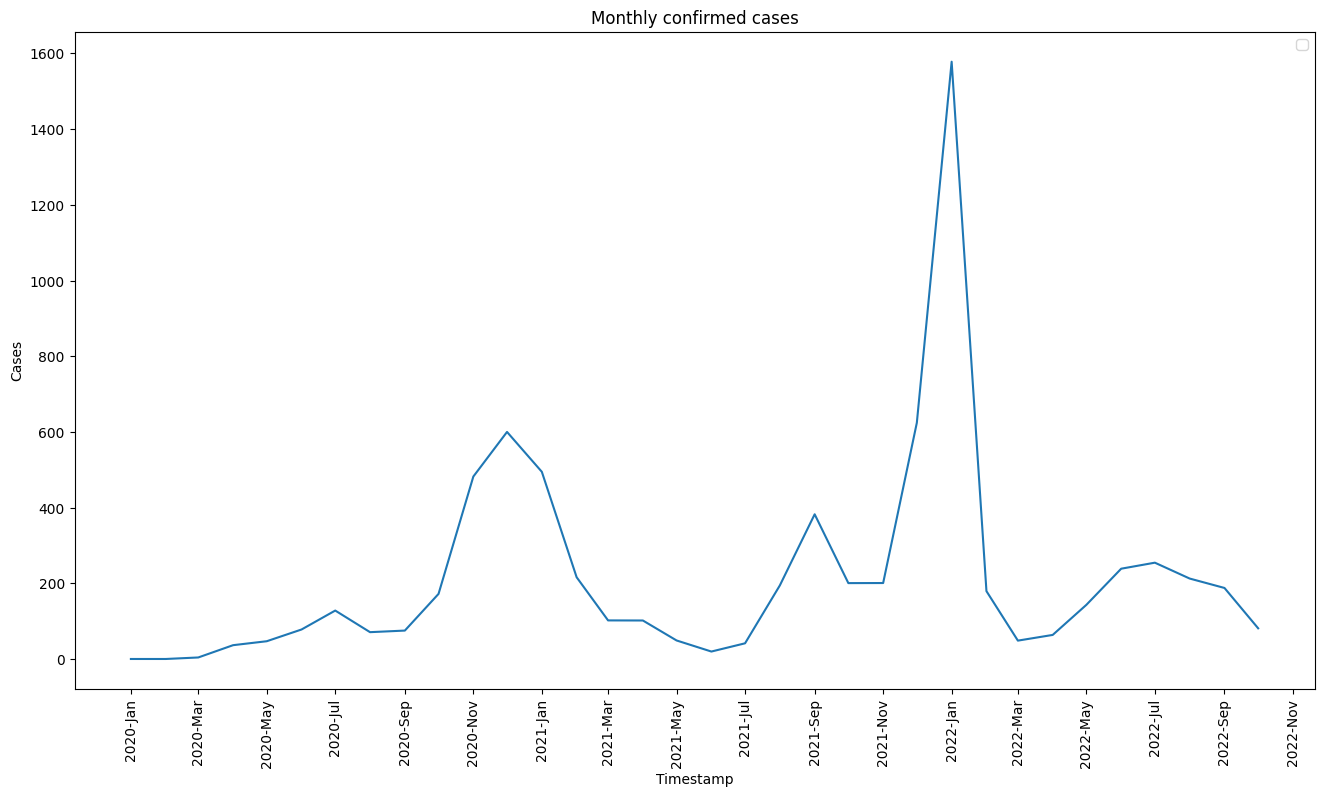

In [67]:
plt.figure(figsize = (16,9))
sns.lineplot(data=Hamilton_df3, x="date", y="monthly_confirmed")
plt.xlabel('Timestamp')
plt.ylabel('Cases')
plt.title('Monthly confirmed cases')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.savefig('Plots\Monthly confirmed cases.jpeg')
plt.show()

### Plot the monthly unemployment rate in the Hamilton county

### 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


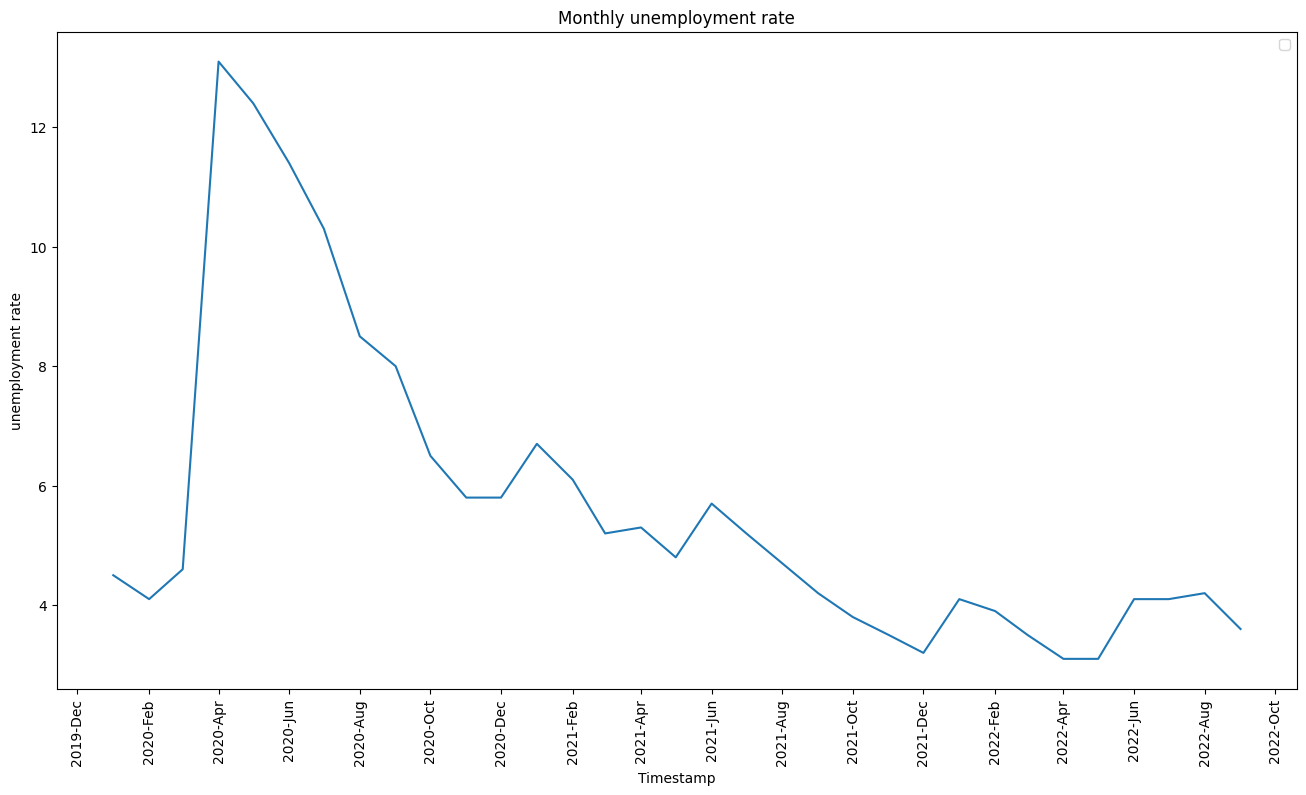

In [68]:
plt.figure(figsize = (16,9))
sns.lineplot(data=Hamilton_df3, x="date", y="unemp_rate")
plt.xlabel('Timestamp')
plt.ylabel('unemployment rate')
plt.title('Monthly unemployment rate')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.savefig('Plots\Monthly unemployment rate.jpeg')
plt.show()

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [70]:
Hamilton_df3.columns

Index(['date', 'monthly_confirmed', 'unemp_rate', 'hotness', 'Date',
       'Education and Health Services', 'Financial Activities', 'Government',
       'Information', 'Leisure and Hospitality', 'Manufacturing',
       'Mining, Logging, and Construction', 'Other Services',
       'Professional and Business Services',
       'Trade, Transportation, and Utilities'],
      dtype='object')

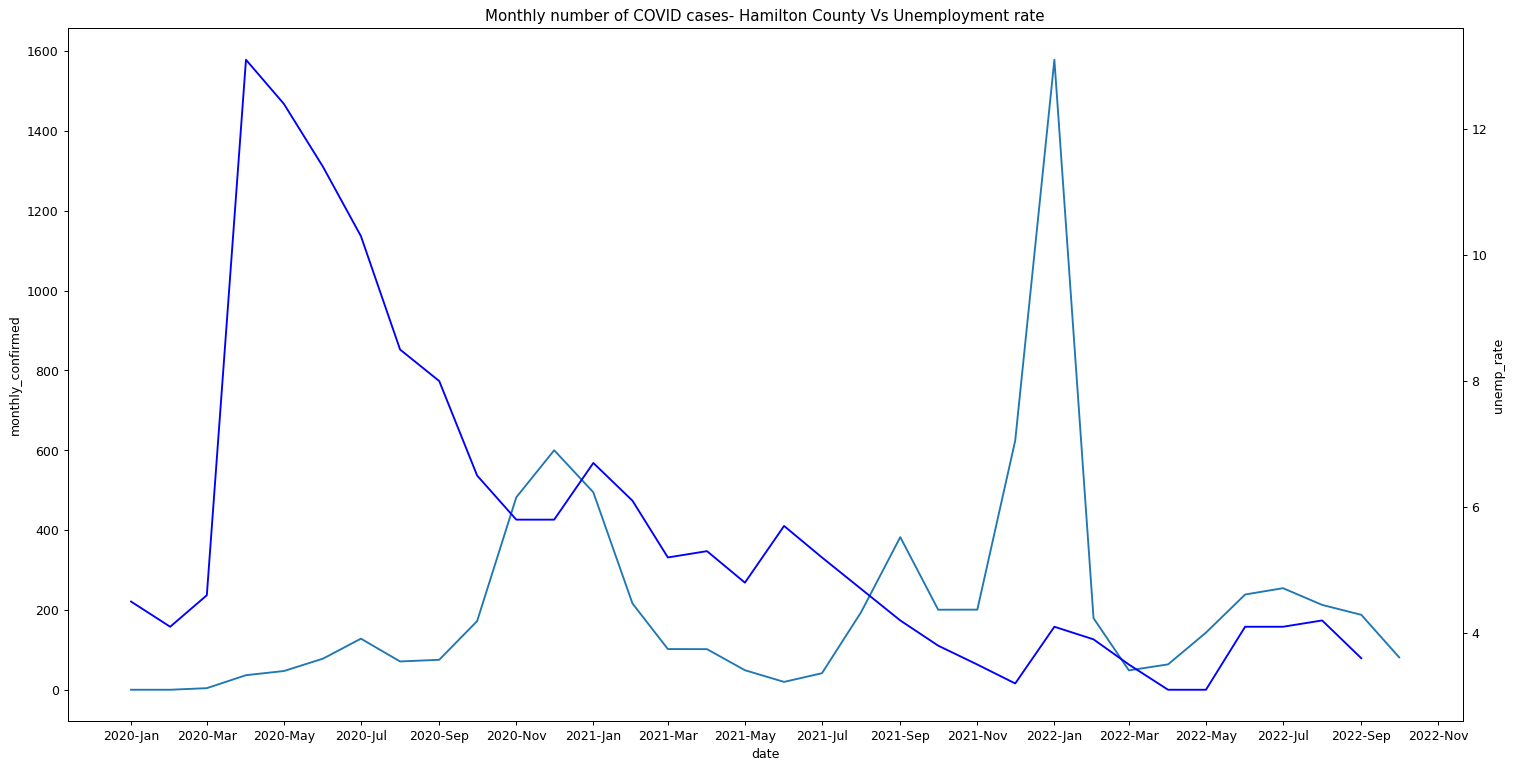

In [72]:
plt.figure(figsize=(20, 10), dpi=90)

sns.lineplot(x = "date", y = "monthly_confirmed", data = Hamilton_df3 )
sns.lineplot(x = "date", y = "unemp_rate", data= Hamilton_df3, color="b", ax = plt.twinx())

dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Monthly number of COVID cases- Hamilton County Vs Unemployment rate')
plt.savefig('Plots\Confirmed cases Vs unemployment rate.jpeg')
plt.show()

In [73]:
Hamilton_df3.isnull().sum()

date                                     0
monthly_confirmed                        0
unemp_rate                               1
hotness                                  0
Date                                    17
Education and Health Services           17
Financial Activities                    17
Government                              17
Information                             17
Leisure and Hospitality                 17
Manufacturing                           17
Mining, Logging, and Construction       17
Other Services                          17
Professional and Business Services      17
Trade, Transportation, and Utilities    17
dtype: int64

We observed that the unemployment rate increases during the beginning of the covid and it decreases in future; the overall declining rate is  surprising and quite opposite to our initial theory.

So we will look into the unemployment rate by different employment sectors to deep dive.

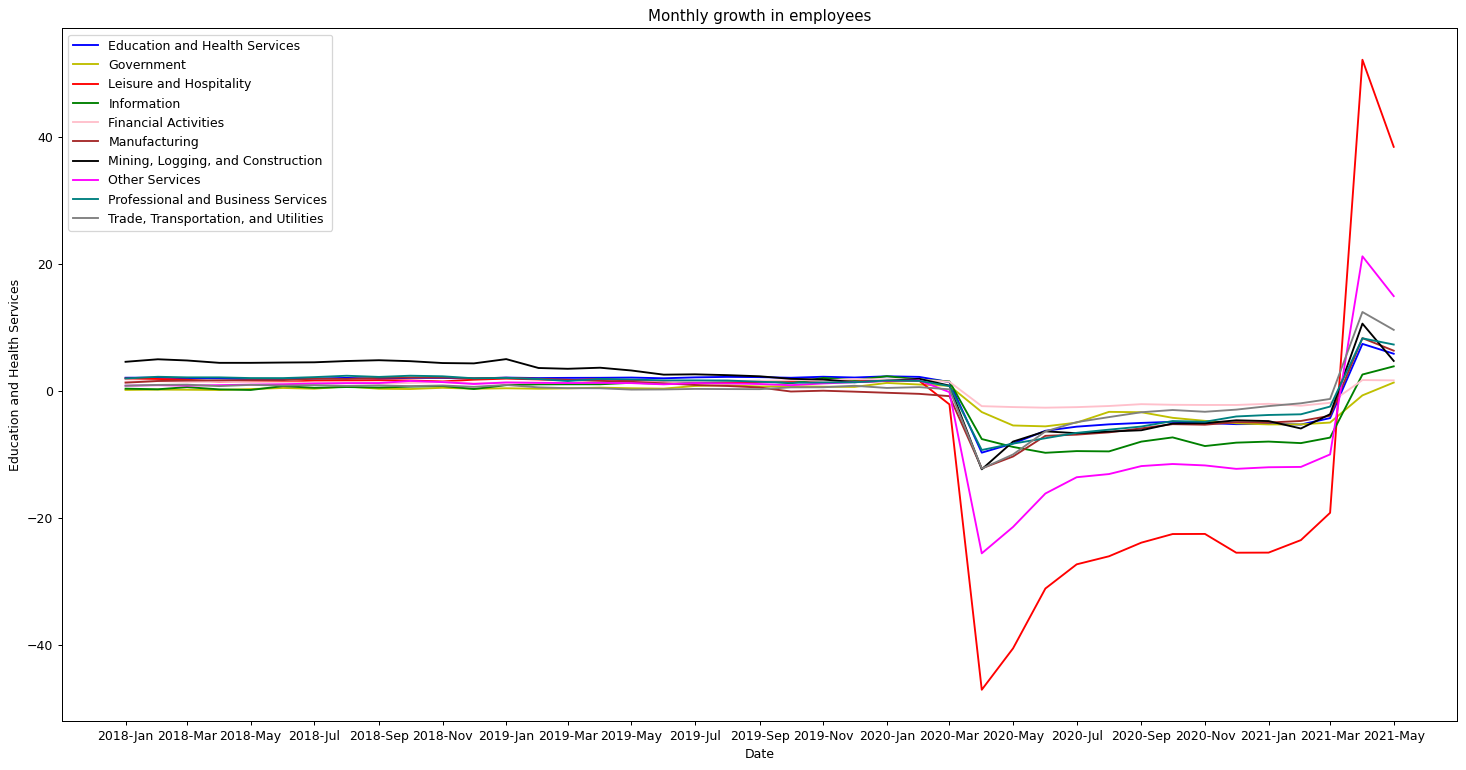

In [74]:
plt.figure(figsize=(20, 10), dpi=90)
sns.lineplot(x = "Date", y = "Education and Health Services", data= unemp_sector_pivot, color="b",label='Education and Health Services')
sns.lineplot(x = "Date", y = "Government", data= unemp_sector_pivot, color="y",label='Government')
sns.lineplot(x = "Date", y = "Leisure and Hospitality", data= unemp_sector_pivot, color="r",label='Leisure and Hospitality')
sns.lineplot(x = "Date", y = "Information", data= unemp_sector_pivot, color="g",label='Information')
sns.lineplot(x = "Date", y = "Financial Activities", data= unemp_sector_pivot, color="pink",label='Financial Activities')
sns.lineplot(x = "Date", y = "Manufacturing", data= unemp_sector_pivot, color="brown",label='Manufacturing')
sns.lineplot(x = "Date", y = "Mining, Logging, and Construction", data= unemp_sector_pivot, color="black",label='Mining, Logging, and Construction')
sns.lineplot(x = "Date", y = "Other Services", data= unemp_sector_pivot, color="magenta",label='Other Services')
sns.lineplot(x = "Date", y = "Professional and Business Services", data= unemp_sector_pivot, color="teal",label='Professional and Business Services')
sns.lineplot(x = "Date", y = "Trade, Transportation, and Utilities", data= unemp_sector_pivot, color="grey",label='Trade, Transportation, and Utilities')
dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Monthly growth in employees')
plt.savefig('Plots\Monthly growth in employees.jpeg')
plt.show()

We can observe that the growth in the employees in different sectors is negative after the onset of covid event but the dip did not stay long and started showing upward trends after April 2020. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


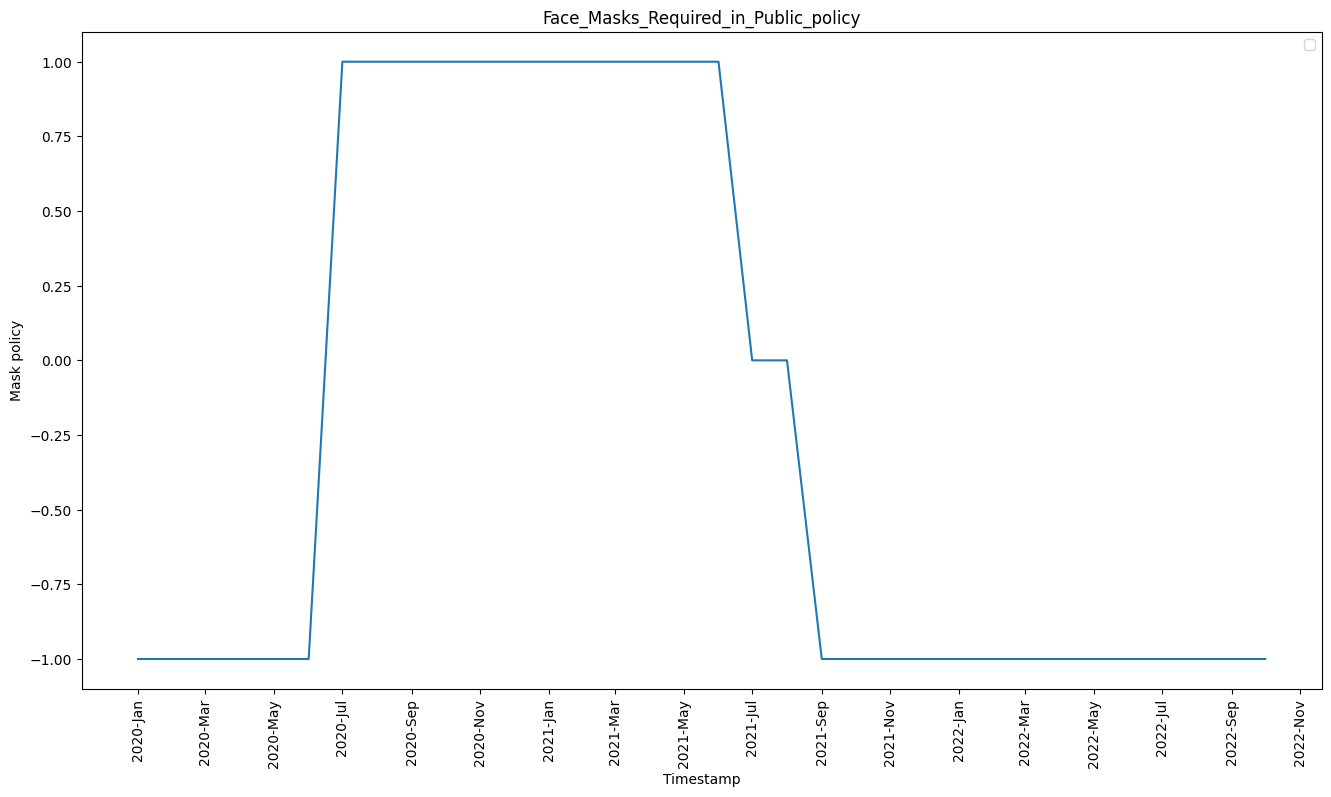

In [75]:
plt.figure(figsize = (16,9))
sns.lineplot(data=Hamilton_df4, x="date", y="Face_Masks_Required_in_Public")
plt.xlabel('Timestamp')
plt.ylabel('Mask policy')
plt.title('Face_Masks_Required_in_Public_policy')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.savefig('Plots\Face_Masks_Required_in_Public_policy.jpeg')
plt.show()

In [76]:
Hamilton_df4.columns

Index(['date', 'monthly_confirmed', 'unemp_rate', 'hotness', 'Date',
       'Education and Health Services', 'Financial Activities', 'Government',
       'Information', 'Leisure and Hospitality', 'Manufacturing',
       'Mining, Logging, and Construction', 'Other Services',
       'Professional and Business Services',
       'Trade, Transportation, and Utilities', 'MM-DD',
       'State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'order_code', 'Face_Masks_Required_in_Public', 'Source_of_Action',
       'URL', 'Citation'],
      dtype='object')

In [77]:
Hamilton_df4[Hamilton_df4['Face_Masks_Required_in_Public'] == 'Yes']['date'].min()

NaT

### Lets now check the market hotness score

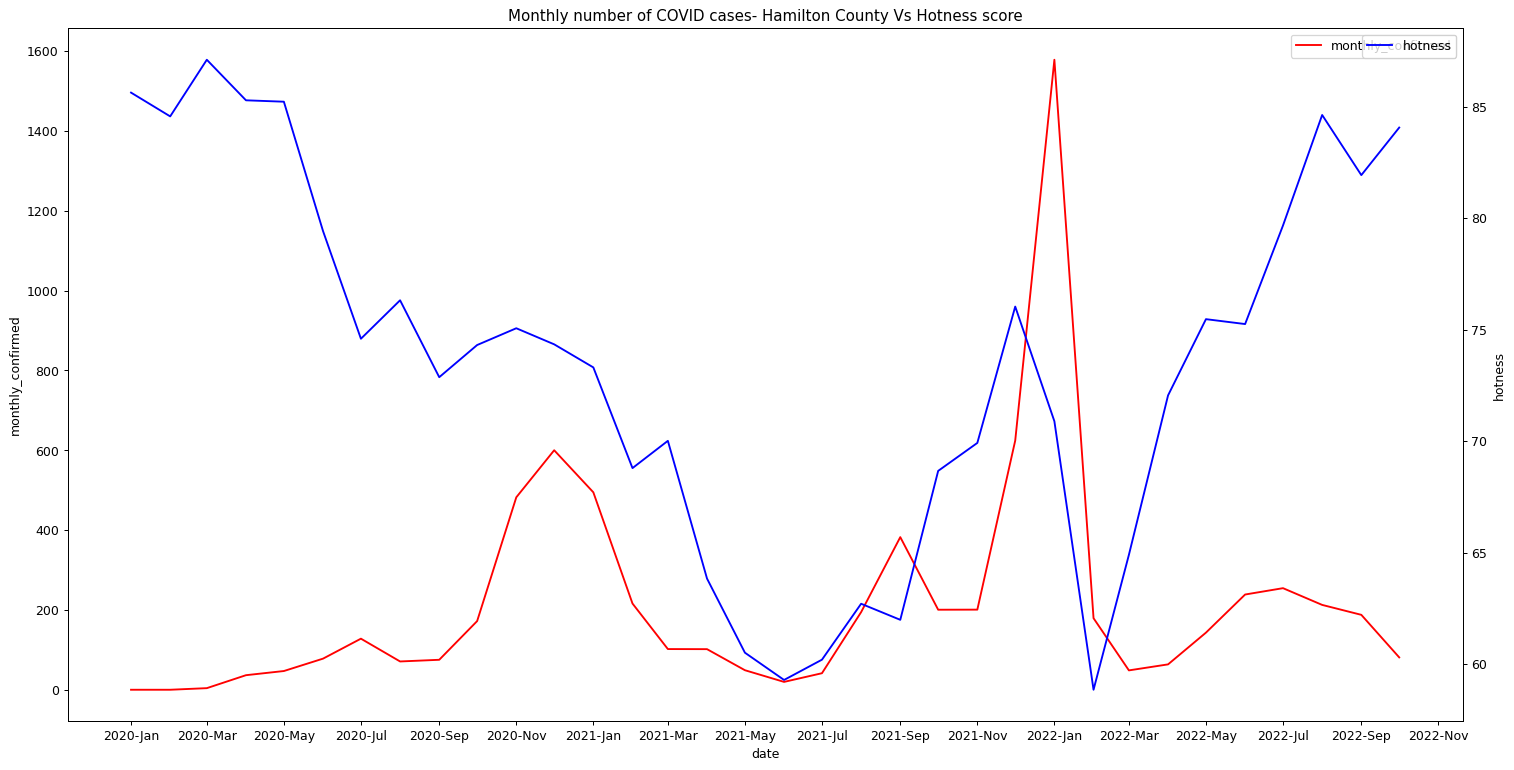

In [78]:
plt.figure(figsize=(20, 10), dpi=90)

sns.lineplot(x = "date", y = "monthly_confirmed", data = Hamilton_df3,color='r',label='monthly_confirmed' )
sns.lineplot(x = "date", y = "hotness", data= Hamilton_df3, color="b",label='hotness', ax = plt.twinx())

dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Monthly number of COVID cases- Hamilton County Vs Hotness score')
plt.savefig('Plots\Confirmed cases Vs Hotness score.jpeg')
plt.show()

The market hotness score decreases initially after the onset of covid in March 2020 which makes sense as there were lockdowns and other policies like mask mandates were in place. But then the score increases even when the cases increased after June 2021 similar to our theory. It kept increasing until Jan 2022 when the omicron variant was spreading rapidly and the cases were at the all time peak.
But then due to vaccination and new booster doses, the mask mandate was removed again and market sentiments changed which led to increase in the hotness score again.

### Let's try to see the correlation between hotness score and unemployment rate with confirmed covid cases

<AxesSubplot: >

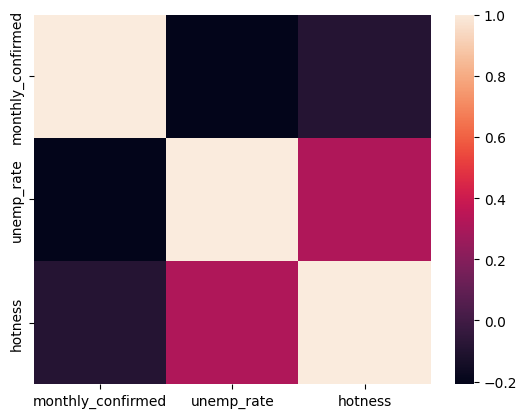

In [79]:
corr_map=Hamilton_df4[['monthly_confirmed','unemp_rate','hotness']].corr()
sns.heatmap(corr_map)

There is no strong correlation between monthly confirmed cases and the unemployment rate. But there is a slight correlation between monthly confirmed cases and hotness score

Since the implementation of different policies like welfare schemes, vaccinations, mask mandates, covid relief schemes after the covid may impact our analysis, we can restrict our analysis to just before and after period of covid. This can show us the immediate impact of covid.

In [80]:
Hamilton_df1

,date,monthly_confirmed,unemp_rate
0,2020-01-01,0.000000,4.5
1,2020-02-01,0.000000,4.1
2,2020-03-01,4.000000,4.6
3,2020-04-01,36.466667,13.1
4,2020-05-01,46.903226,12.4
5,2020-06-01,77.933333,11.4
6,2020-07-01,127.967742,10.3
7,2020-08-01,70.870968,8.5
8,2020-09-01,75.066667,8.0
9,2020-10-01,172.000000,6.5


In [81]:
new_data={'date':['2019-12-01','2019-11-01','2019-10-01','2019-09-01','2019-09-01'],'monthly_confirmed':[0,0,0,0,0]}
new_df=pd.DataFrame(new_data)
new_df['date']=pd.to_datetime(new_df['date'])

In [82]:
hamilton_df0_n=pd.concat([RAW_us_confirmed_county_monthly,new_df],axis=0)

In [83]:

Hamilton_df1_n = hamilton_df0_n.merge(unemp, on='date', how='left')

In [84]:
Hamilton_df2_n=Hamilton_df1_n.merge(hotness,on='date',how='left')

In [85]:
Hamilton_df3_n=Hamilton_df2_n.merge(unemp_sector_pivot,left_on='date',right_on='Date',how='left')

In [86]:
Hamilton_df3_n.head()

,date,monthly_confirmed,unemp_rate,hotness,Date,Education and Health Services,Financial Activities,Government,Information,Leisure and Hospitality,Manufacturing,"Mining, Logging, and Construction",Other Services,Professional and Business Services,"Trade, Transportation, and Utilities"
0,2020-01-01,0.000000,4.5,85.633626,2020-01-01,2.310583,1.834239,1.267380,2.325500,1.609171,-0.281331,1.593830,1.593751,1.661021,0.479676
1,2020-02-01,0.000000,4.1,84.567127,2020-02-01,2.219661,1.798931,1.018264,1.820006,1.609813,-0.450826,1.919334,1.652993,1.587687,0.607346
2,2020-03-01,4.000000,4.6,87.107905,2020-03-01,1.404297,1.445555,0.816219,1.512051,-2.109376,-0.812236,0.843494,-0.179437,0.775570,0.266564
3,2020-04-01,36.466667,13.1,85.288582,2020-04-01,-9.706576,-2.386266,-3.314354,-7.564080,-47.024138,-12.184413,-12.332459,-25.553251,-9.288705,-12.217347
4,2020-05-01,46.903226,12.4,85.225847,2020-05-01,-8.263252,-2.530473,-5.427965,-8.805991,-40.510336,-10.312546,-7.964506,-21.398539,-8.282422,-9.988351


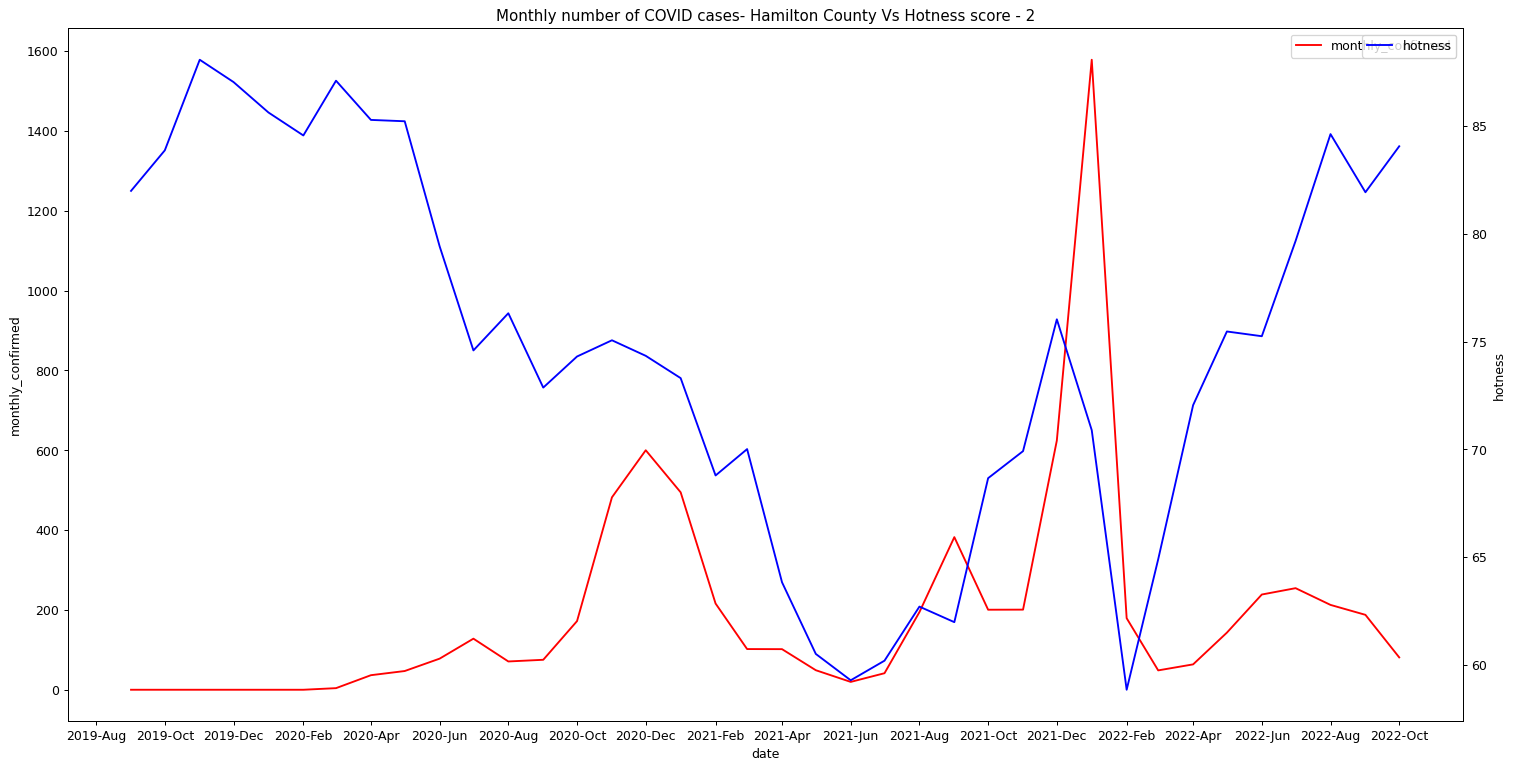

In [89]:
plt.figure(figsize=(20, 10), dpi=90)

sns.lineplot(x = "date", y = "monthly_confirmed", data = Hamilton_df3_n,color='r',label='monthly_confirmed' )
sns.lineplot(x = "date", y = "hotness", data= Hamilton_df3_n, color="b",label='hotness', ax = plt.twinx())

dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Monthly number of COVID cases- Hamilton County Vs Hotness score - 2')
plt.savefig('Plots\Confirmed cases Vs Hotness score_2.jpeg')
plt.show()

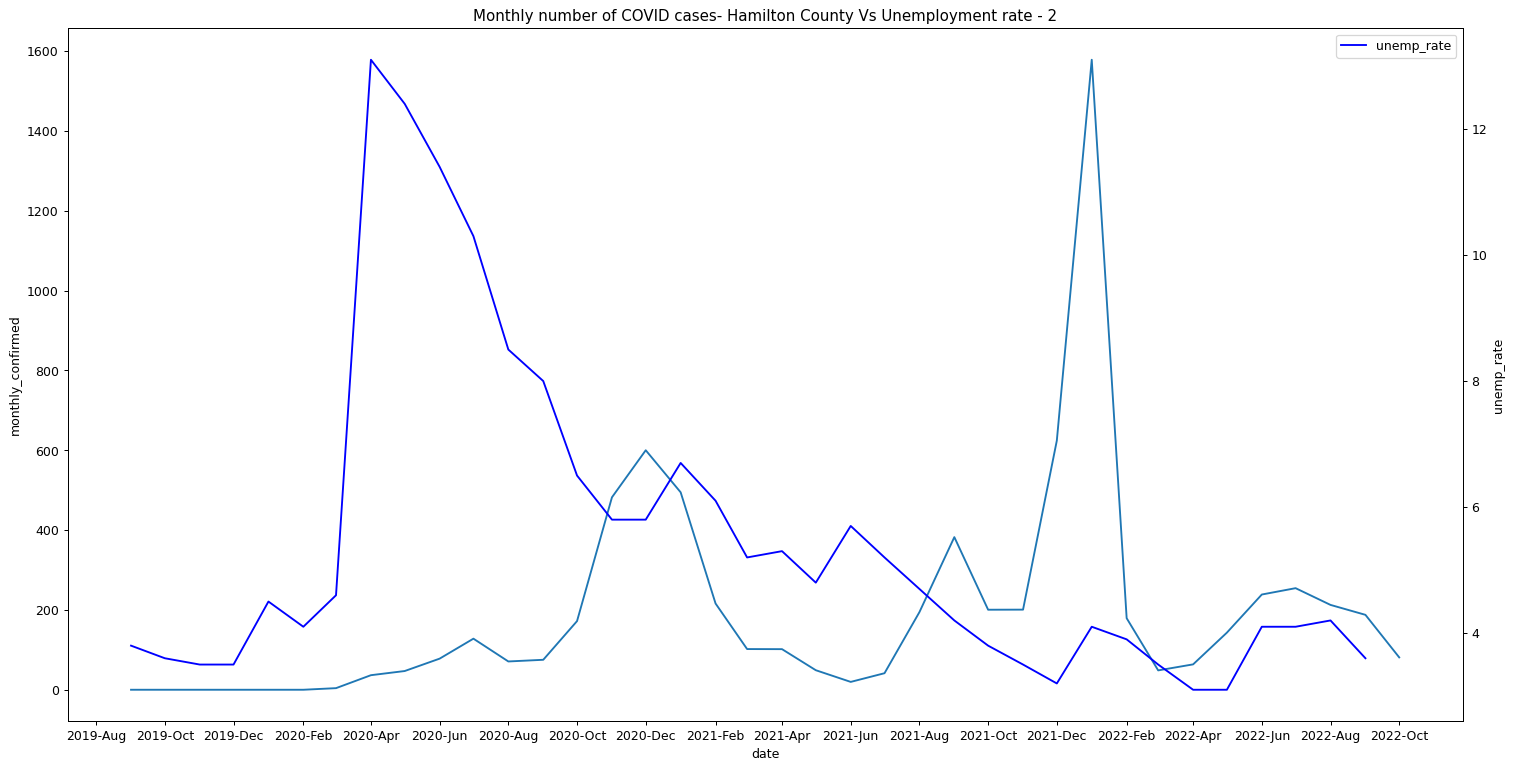

In [90]:
plt.figure(figsize=(20, 10), dpi=90)

sns.lineplot(x = "date", y = "monthly_confirmed", data = Hamilton_df3_n )
sns.lineplot(x = "date", y = "unemp_rate", data= Hamilton_df3_n,label='unemp_rate', color="b", ax = plt.twinx())

dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Monthly number of COVID cases- Hamilton County Vs Unemployment rate - 2')
plt.savefig('Plots\Confirmed cases Vs unemployment rate_2.jpeg')
plt.show()

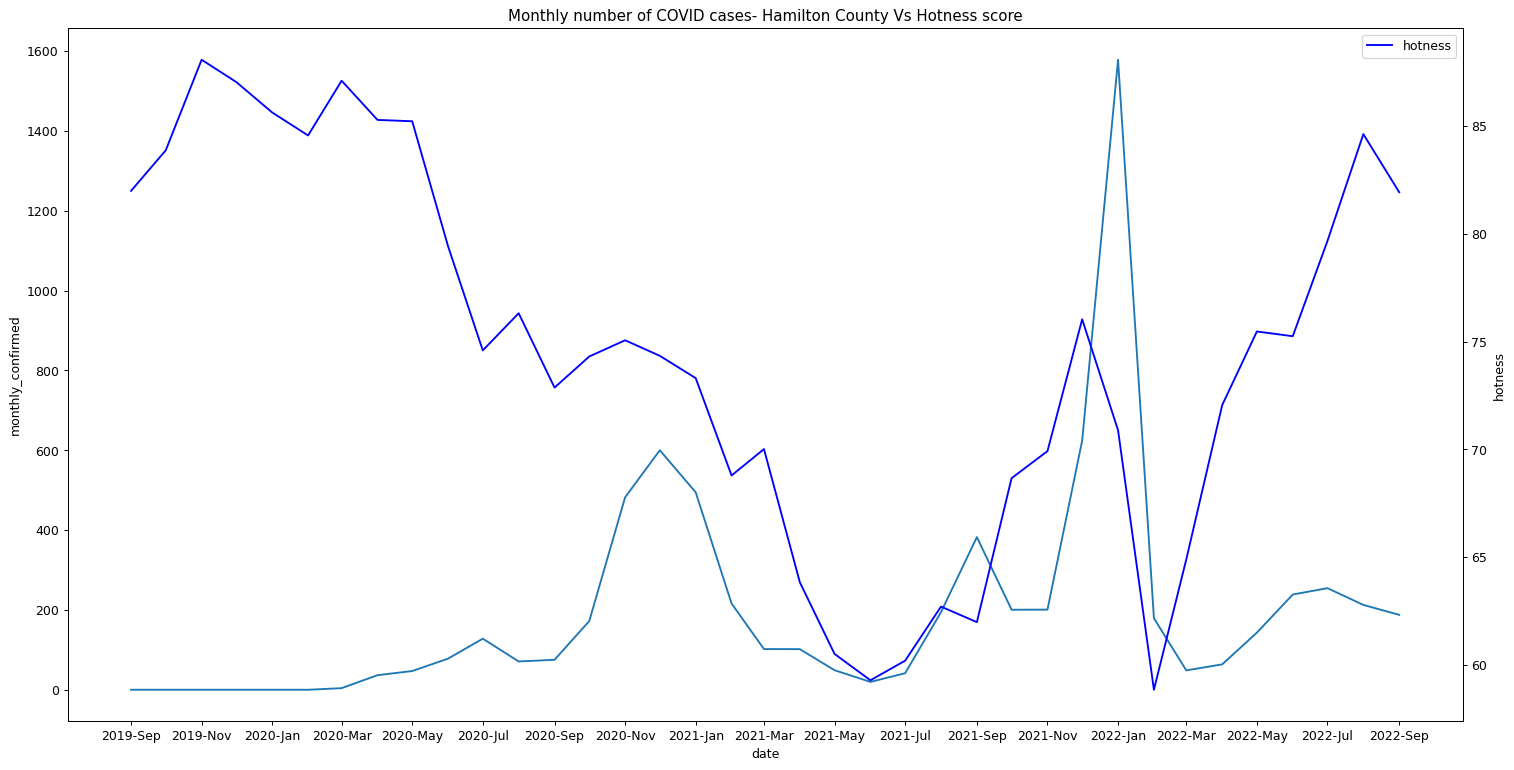

In [225]:
plt.figure(figsize=(20, 10), dpi=90)

sns.lineplot(x = "date", y = "monthly_confirmed", data = Hamilton_df3_n )
sns.lineplot(x = "date", y = "hotness", data= Hamilton_df3_n, color="b",label='hotness', ax = plt.twinx())

dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('Monthly number of COVID cases- Hamilton County Vs Hotness score')
plt.savefig('Confirmed cases Vs unemployment rate.jpeg')
plt.show()

### Deriving pearson coefficient

In [91]:
Hamilton_df3_n.dropna(subset=['unemp_rate'],axis=0,inplace=True)
Hamilton_df3_n.isnull().sum()

date                                     0
monthly_confirmed                        0
unemp_rate                               0
hotness                                  0
Date                                    16
Education and Health Services           16
Financial Activities                    16
Government                              16
Information                             16
Leisure and Hospitality                 16
Manufacturing                           16
Mining, Logging, and Construction       16
Other Services                          16
Professional and Business Services      16
Trade, Transportation, and Utilities    16
dtype: int64

In [92]:
from scipy.stats import pearsonr
 
# Import your data into Python

# Convert dataframe into series
x = Hamilton_df3_n['monthly_confirmed']
y = Hamilton_df3_n['unemp_rate']
z=Hamilton_df3_n['hotness']
 
# Apply the pearsonr()
corr1, _ = pearsonr(x, y)
corr2, _ = pearsonr(x, z)
print('Pearsons correlation between the number of covid cases and unemployment rate is : %.3f' % corr1)
print('Pearsons correlation between the number of covid cases and hotness is : %.3f' % corr2)

Pearsons correlation between the number of covid cases and unemployment rate is : -0.123
Pearsons correlation between the number of covid cases and hotness is : -0.179


### Regression  Analysis

Let's look at the assumptions - Linearity, Homoscedascity and Normality

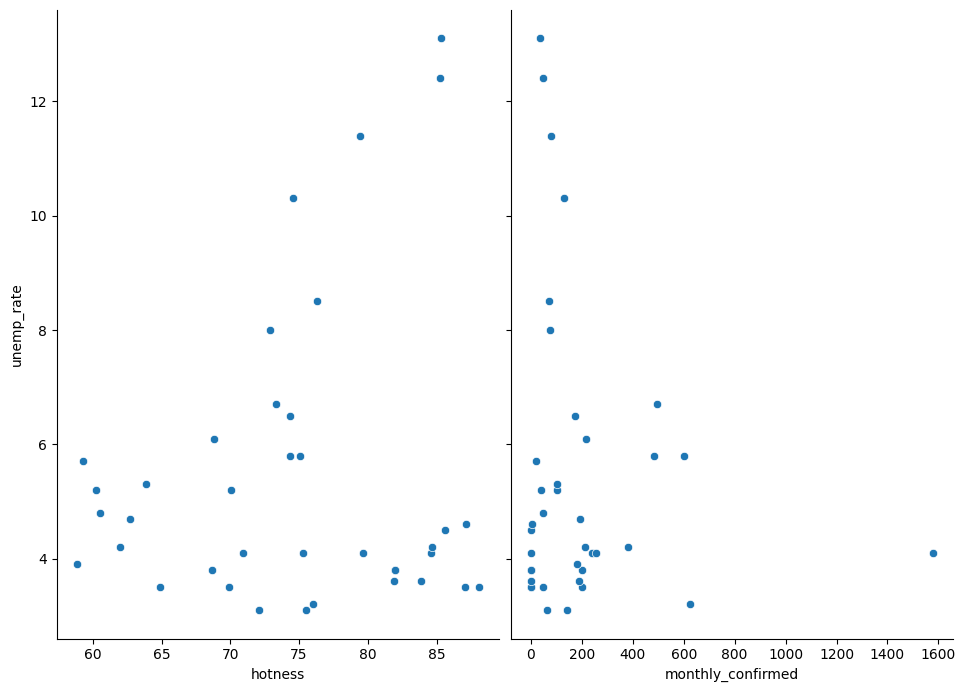

In [209]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(Hamilton_df3_n, x_vars=['hotness','monthly_confirmed'], y_vars='unemp_rate', size=7, aspect=0.7)

In [93]:
# import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols



### Regression analysis between monthly confirmed cases and unemployment rate

                            OLS Regression Results                            
Dep. Variable:             unemp_rate   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5501
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.463
Time:                        02:09:27   Log-Likelihood:                -89.178
No. Observations:                  38   AIC:                             182.4
Df Residuals:                      36   BIC:                             185.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.6139      0.50

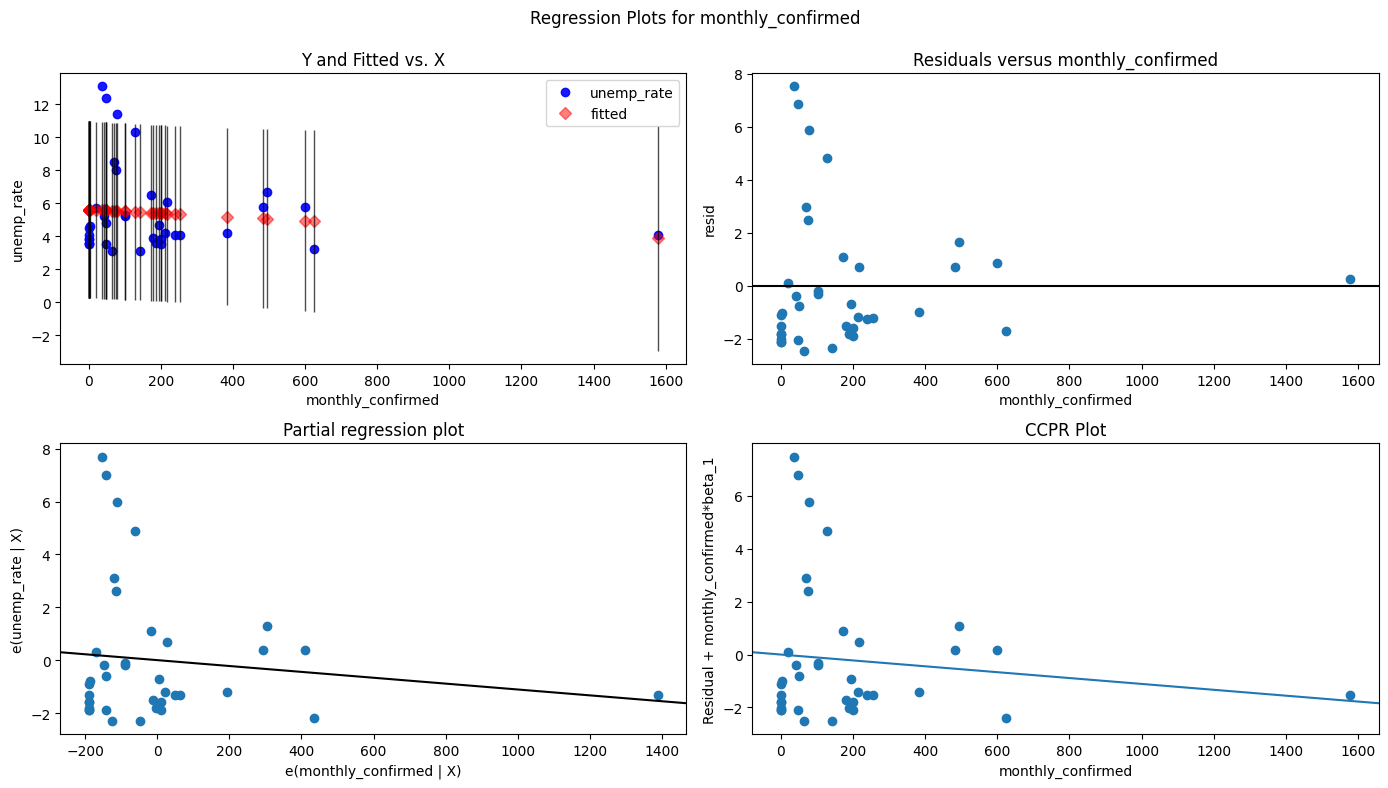

In [94]:

# fit simple linear regression model
linear_model = ols('unemp_rate ~ monthly_confirmed',
				data=Hamilton_df3_n).fit()

# display model summary
print(linear_model.summary())

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
									'monthly_confirmed',
									fig=fig)


### Regression analysis between monthly confirmed cases and hotness score

                            OLS Regression Results                            
Dep. Variable:                hotness   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.192
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.282
Time:                        02:10:07   Log-Likelihood:                -135.55
No. Observations:                  38   AIC:                             275.1
Df Residuals:                      36   BIC:                             278.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            75.7015      1.72

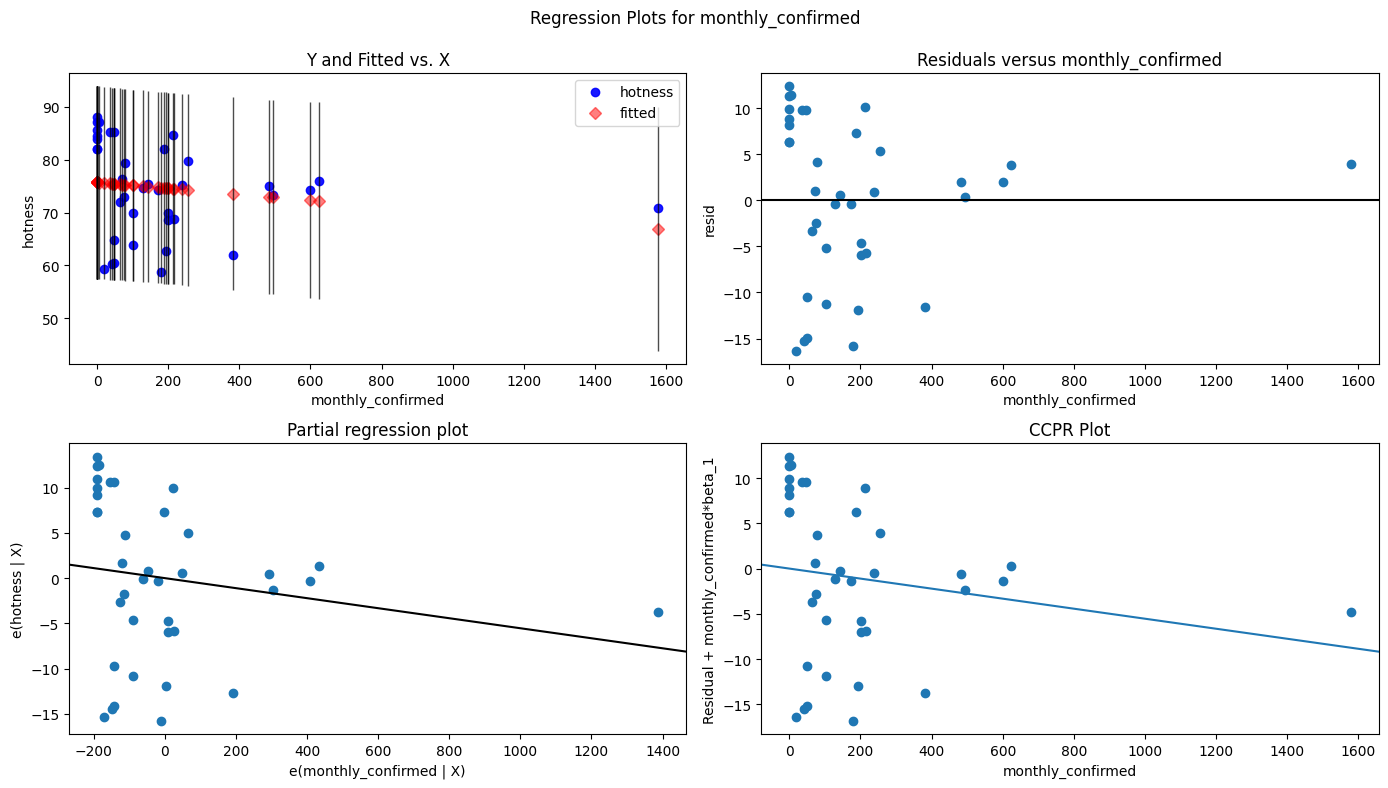

In [96]:

# fit simple linear regression model
linear_model = ols('hotness ~ monthly_confirmed',
				data=Hamilton_df3_n).fit()

# display model summary
print(linear_model.summary())

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
									'monthly_confirmed',
									fig=fig)
